In [193]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import mpld3

In [195]:
data = np.load("20150924_133903.npz")
data.keys()

['time', 'ang', 'vel', 'mag', 'pos', 'acl', 'qtn']

#### plt.figure(figsize=(15,5))
plt.plot(data['time'],  data['acl'][:,0:2], 'o-')
plt.xlim(2,3)
plt.show()

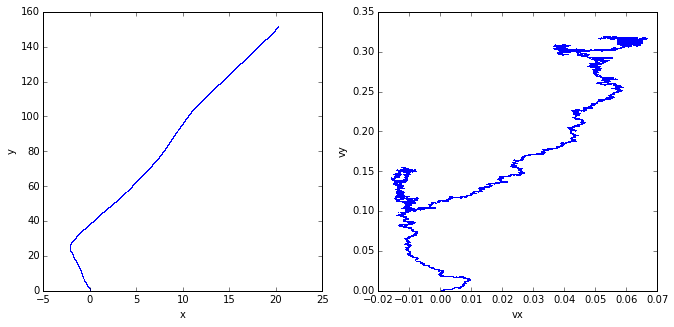

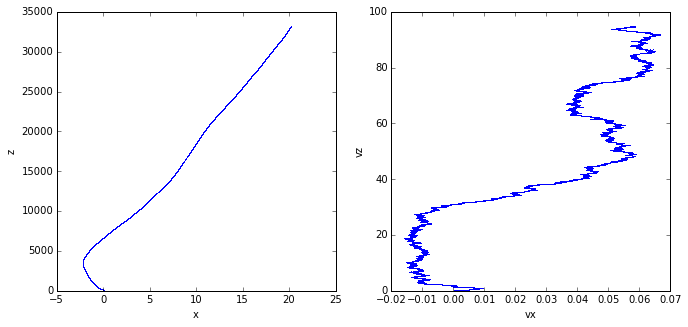

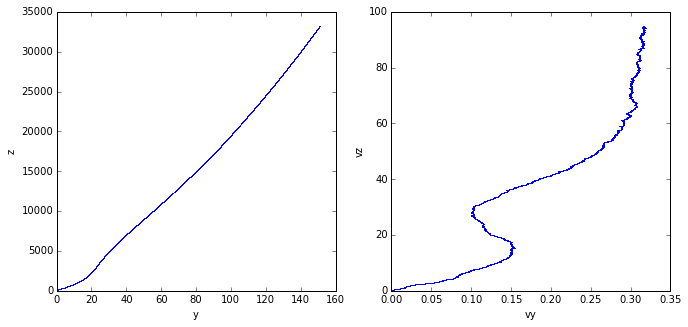

In [182]:
for h_idx, v_idx, h_label, v_label in [[0, 1, 'x', 'y'], [0, 2, 'x', 'z'], [1, 2, 'y', 'z']]:
    plt.figure(figsize=(11,5))
    plt.subplot(1,2,1)
    plt.plot(data['pos'][:,h_idx], data['pos'][:,v_idx], ',')
    plt.xlabel(h_label)
    plt.ylabel(v_label)
    plt.subplot(1,2,2)
    plt.plot(data['vel'][:,h_idx], data['vel'][:,v_idx], ',')
    plt.xlabel('v'+h_label)
    plt.ylabel('v'+v_label)
    plt.show()

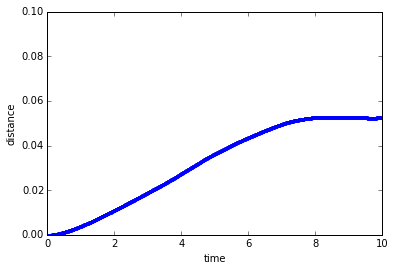

In [183]:
xy = [np.linalg.norm(r[0:1]) for r in data['pos']]
plt.plot(data['time'], xy, '.-')
plt.xlim(0,10)
plt.ylim(0,0.1)
plt.xlabel('time')
plt.ylabel('distance')
plt.show()
#mpld3.display()

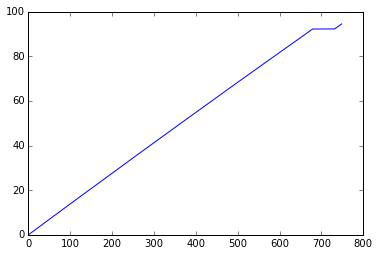

In [184]:
vel = [np.linalg.norm(v) for v in data['vel']]
plt.plot(data['time'], vel)

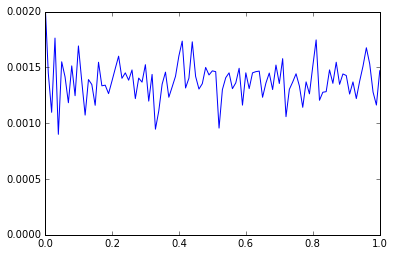

In [192]:
dv = np.diff([0] + vel)
plt.plot(data['time'], dv, '-')
plt.xlim(0,1)
plt.ylim(0, 0.002)
plt.show()

In [186]:
dv_av = np.average(dv)
dv_var = np.var(dv)
print("dv average: %e" % dv_av)
print("dv variance: %e" % dv_var)

dv average: 1.357206e-03
dv variance: 2.434527e-08


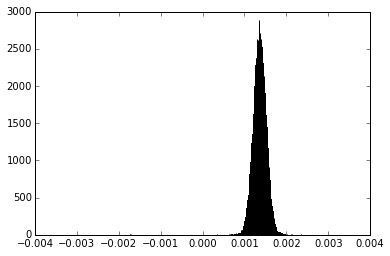

In [187]:
plt.hist(dv, bins=1000, normed=1)
plt.xlim(-0.004, 0.004)
plt.show()

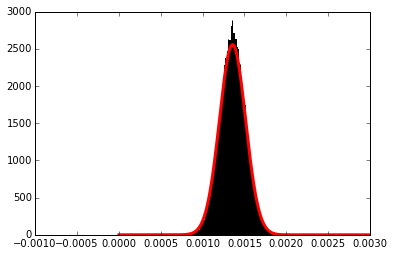

In [188]:
plt.hist(dv, bins=1000, normed=1)
x = np.arange(- 0.0, 0.003, 0.00001)
y = (1./np.sqrt(2*np.pi*(dv_var))) * np.exp(-(x - dv_av)**2./(2. * dv_var))
plt.plot(x, y, 'r', linewidth=3.0)
plt.xlim(-0.001, 0.003)
plt.show()